In [1]:
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak

import SBNDstyle
import matplotlib.pyplot as plt
plt.style.use('SBND.mplstyle')


Bad value in file 'SBND.mplstyle', line 40 ('axes.prop_cycle: cycler("color", ["#E7004C", "#FF9664","#005A8F","#00BBCC","#00CE7C","#3BD4AE","#A1DED2","#8B6969","#DAA8E2",])'): Key axes.prop_cycle: 'cycler("color", ["' is not a valid cycler construction: unterminated string literal (detected at line 1) (<unknown>, line 1)


In [9]:
import glob
DEBUG =False
V_IN = 400 #mV

file_list = glob.glob('/media/rodrigoa/Andresito/FBK_Preproduccion/Calibracion_amplificador/'+str(V_IN)+'**')
file_list = glob.glob('/media/rodrigoa/DiscoDuro/FBK_Preproduccion/Calibracion_amplificador/'+str(V_IN)+'**')

print("number of files: ")
print(len(file_list))
print("first 5 files: ")
for i in range(5):print(file_list[i])


number of files: 
8524
first 5 files: 
/media/rodrigoa/DiscoDuro/FBK_Preproduccion/Calibracion_amplificador/400mV--04295.txt
/media/rodrigoa/DiscoDuro/FBK_Preproduccion/Calibracion_amplificador/400mV--00012.txt
/media/rodrigoa/DiscoDuro/FBK_Preproduccion/Calibracion_amplificador/400mV--00013.txt
/media/rodrigoa/DiscoDuro/FBK_Preproduccion/Calibracion_amplificador/400mV--00014.txt
/media/rodrigoa/DiscoDuro/FBK_Preproduccion/Calibracion_amplificador/400mV--00015.txt


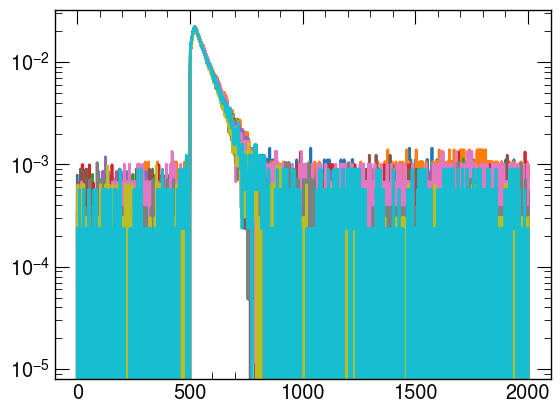

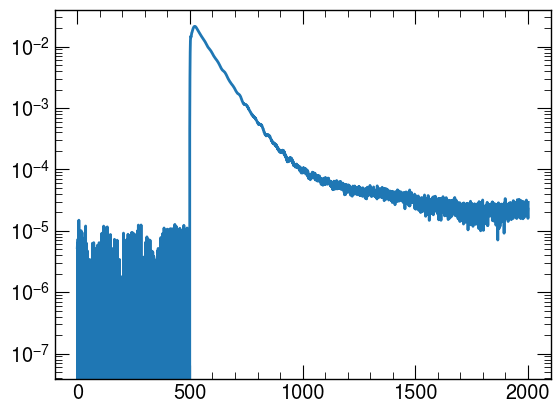

In [10]:
#try reading the first file

file1_path = file_list[0]
HEADER=3
N_SEGMENTs=50
PRETRIGGER=5e-6 #in s

def SPE_get_ADCs_file(file_path):
    ADCs=np.loadtxt(file_path, delimiter=',', skiprows=5)
    period=ADCs[1,0]-ADCs[0,0]
    ADCs=ADCs[:,1]
    return ADCs,period

    
def SPE_get_ADCs_file_list(file_list,polarity=-1,PED_RANGE=200):
    ADCs_list=[]
    for file_path in file_list:
        ADCs,period=SPE_get_ADCs_file(file_path)
        ADCs_list.append(ADCs)
    ADCs=np.array(ADCs_list)
    
    ADCs = (ADCs.T - np.mean(ADCs[:, :PED_RANGE], axis=1).T).T
    ADCs*=polarity
    return ADCs,period


ADCs, period= SPE_get_ADCs_file_list(file_list)

DEBUG=True
if DEBUG:
    for i in range(10):
        plt.plot(ADCs[i,:])
    plt.semilogy()
    plt.figure()
    avg_ADCs=np.mean(ADCs,axis=0)
    plt.plot(avg_ADCs)
    plt.semilogy()

## Charge

charge mean:  1.440450113648109
charge mean:  1.8667209873212622
charge mean:  1.9831754806558823
charge mean:  2.0193587501824215
charge mean:  2.0334636073326022
period:  9.999999999999904e-09
Q_in:  8.163265306122449e-13
Q_out:  4.0669272146651656e-10
498.1985837964828


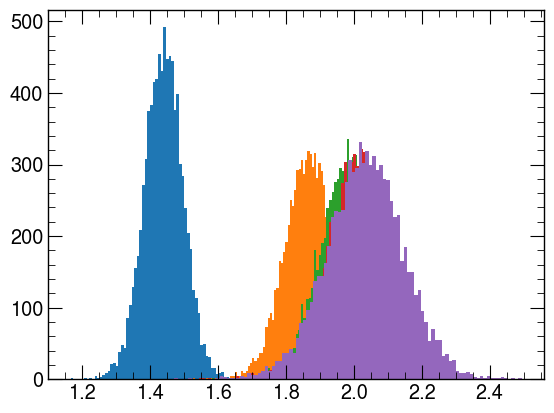

In [11]:
for i in [600,700,800,900,1000]:

    charge=np.sum(ADCs[:,200:i],axis=1)
    plt.hist(charge,bins=100);
    
    print("charge mean: ",np.mean(charge))
    
def Q_in(V_in):
    #V_in in Volts
    #      pF        Vc     200,300...mV
    q=10*10**(-12) *10/49 *V_in
    return q

def Q_out(V_out,period):
    #   V_out in Volts
    #          osc resistance    x  t
    q=V_out  /      50          *   period
    return q
print("period: ",period)
print("Q_in: ",Q_in(V_IN/1000))
print("Q_out: ",Q_out(np.mean(charge),period=period))

Amp_factor=Q_out(np.mean(charge),period=period)/Q_in(V_IN/1000)
print(Amp_factor)